26501


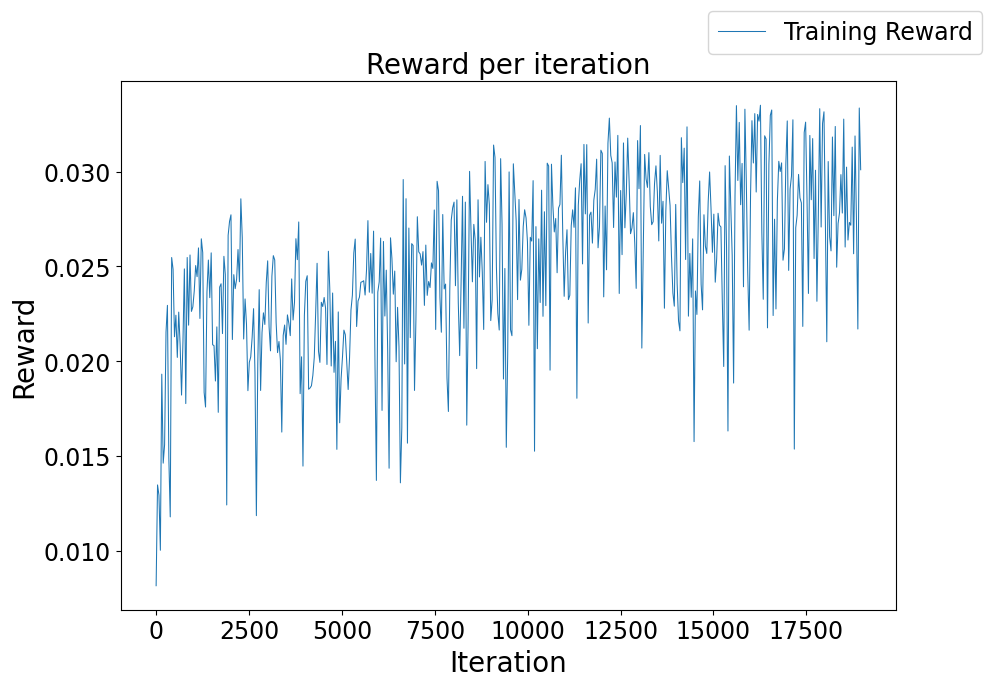

In [1]:
import matplotlib.pyplot as plt
import math
import pickle


import matplotlib.pylab as pylab
params = {'legend.fontsize': '17',
#           'figure.figsize': (15, 5),
         'axes.labelsize': '17',
         'axes.titlesize':'17',
         'xtick.labelsize':'17',
         'ytick.labelsize':'17'}
pylab.rcParams.update(params)


with open('rewardpegasus_RL_newcal_self_longer5_val_lembda.95.th90.pickle', 'rb') as handle:
    data_list = pickle.load(handle)
# data_list =data_list [0: len(data_list)-3000]
print(len(data_list))
data_list = data_list[0:19000]
# print(data_list[0:10])
# for i in range(len(data_list)):
# #     if data_list[i] > 0.1:
# #         data_list[i] = 0.1
#     if data_list[i] < -10:
#         data_list[i] = -10

        
def display_batch_loss_x(batch_losses, file_name , graph_type="Loss"):
    font_size =20
    graph_len = 500
    
    if len(batch_losses)<=graph_len:
        return
    plt.clf()
    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    fig.set_dpi(100)
    
    
    avg_loss = [0] * graph_len
    
    avg_bucket_values = []
    
    X= [] 
#     print('len(batch_losses)',len(batch_losses))
    if len(batch_losses)>graph_len:
        avg_bucket_size = int( len(batch_losses)/graph_len)
#         print('avg_bucket_size', avg_bucket_size)
        for i in range(int(len(batch_losses)/avg_bucket_size)):
#             print(i*avg_bucket_size,(i+1)*avg_bucket_size)
            bucket = batch_losses[i*avg_bucket_size:(i+1)*avg_bucket_size]
            avg_bucket_values.append( sum(bucket)/len(bucket))
            X.append(i*avg_bucket_size)
    else:
        avg_bucket_size = 1
        avg_bucket_values=batch_losses 
        X = [i for i in range( len(batch_losses))]
        

    plt.plot(X,avg_bucket_values , label='Training '+graph_type,linewidth=.75)

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("Iteration", fontsize=font_size)
    plt.ylabel(graph_type,fontsize=font_size)
    plt.title(graph_type+" per iteration",fontsize=font_size)
#     xtick.labelsize = 20
    # Adding legend, which helps us recognize the curve according to it's color
    fig.legend()
    
    fig.savefig( file_name+'_new.pdf',dpi=100)
    


display_batch_loss_x(data_list , 'reward_scst_r1', 'Reward')

In [1]:
import random
import pickle
gold_path = '/home/raisul/fusion/dataset/google_validation_set_merged.tsv'
gold_data = []
gold_label = []
gold_label_list = []
delim = '\t'
gold_rows = []
# with open(gold_path, 'r') as read_obj:
#     csv_reader = reader(read_obj , delimiter='\t')
#     for idx,row in enumerate(csv_reader):
# #         print(row[2])
#         if row[2].lower()!= 'none':
#             gold_rows.append(row)
# #             gold_data.append( row[0]+delim+row[1])
# #             gold_label.append(row[2])
# #             gold_label_list.append([row[2]])

# random.shuffle(gold_rows)


# with open('val_test.pickle', 'wb') as handle:
#     pickle.dump(gold_rows, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('val_test.pickle', 'rb') as handle:
    gold_rows = pickle.load(handle)





print(len(gold_rows))


test_data = []
test_label = []
test_label_list = []


val_data = []
val_label = []
val_label_list = []

testing = True
for idx,row in enumerate(gold_rows):
#     if idx<150:
#         val_data.append( row[0]+delim+row[1])
#         val_label.append(row[2])
#         val_label_list.append([row[2]])
#     else:
#     if testing==False:
#         if idx>149:
#             break
#     else:
#         if idx<150:
#             continue
        
    test_data.append( row[0]+delim+row[1])
    test_label.append(row[2])
    test_label_list.append([row[2]])
    


print( len(test_data))

483
483


In [2]:
from nltk.tokenize import word_tokenize
# print(test_data)
len_list = []
for test_input in test_data:
    s1,s2 = test_input.split(delim)
#     print(word_tokenize(s1))
    l1 = len(word_tokenize(s1))
    l2  =  len(word_tokenize(s2))
    len_list.append(l1)
    len_list.append(l2)
#     len_list.append()
    
print(sum(len_list)/len(len_list))
c = 0
for l in len_list:
  if l>=15:
    c = c+1
print(c)

12.746376811594203
324


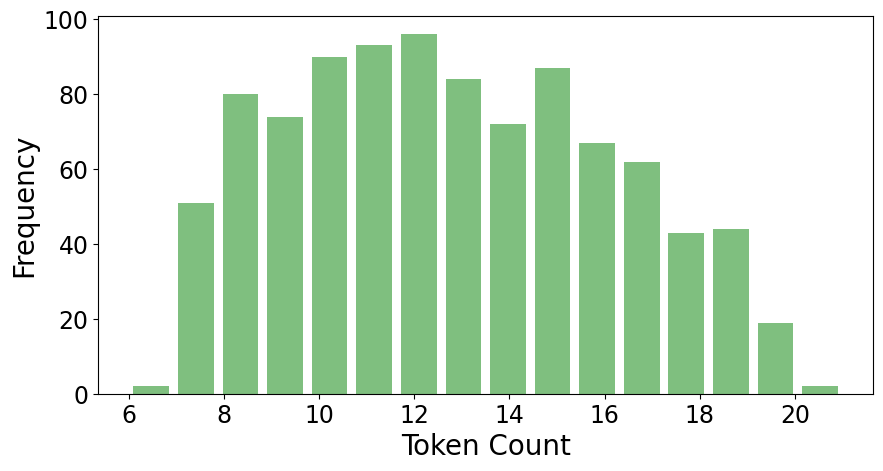

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [14]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': '17',
#           'figure.figsize': (15, 5),
         'axes.labelsize': '17',
         'axes.titlesize':'17',
         'xtick.labelsize':'17',
         'ytick.labelsize':'17'}
pylab.rcParams.update(params)
font_size=20
plt.clf()
fig = plt.gcf()
fig.set_size_inches(10, 5)
fig.set_dpi(100)
x = len_list
num_bins = 16
n, bins, patches = plt.hist(x, num_bins, facecolor='green', alpha=0.5, rwidth=.8)
plt.xlabel('Token Count',fontsize=font_size)
plt.ylabel('Frequency',fontsize=font_size)
plt.show()
fig.legend()
    
fig.savefig( 'sample_frequency.pdf',dpi=100)
# plt.title()